In [1]:
#import all the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [2]:
#import the dataset
url =  "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
name = ["Sqft","Floor","TotalFloor","Bedroom","Living.Room","Bathroom","Price"]
df1 = pd.read_csv(url,names = name)

In [3]:
#checking
df1.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
NaN,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1.0,1177.698,2,7,2,2,2,62000
2.0,2134.8,5,7,4,2,2,78000
3.0,1138.56,5,7,2,2,1,58000
4.0,1458.78,2,7,3,2,2,45000


In [4]:
#removing the unwanted 1st row
df1 = df1.iloc[1:]

In [5]:
#checking
df1.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1.0,1177.698,2,7,2,2,2,62000
2.0,2134.8,5,7,4,2,2,78000
3.0,1138.56,5,7,2,2,1,58000
4.0,1458.78,2,7,3,2,2,45000
5.0,967.776,11,14,3,2,2,45000


In [6]:
#info of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 645 entries, 1.0 to 648.0
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sqft         645 non-null    object
 1   Floor        645 non-null    object
 2   TotalFloor   645 non-null    object
 3   Bedroom      645 non-null    object
 4   Living.Room  645 non-null    object
 5   Bathroom     645 non-null    object
 6   Price        645 non-null    object
dtypes: object(7)
memory usage: 40.3+ KB


In [7]:
#converting the dataypes
df1["Sqft"] = df1['Sqft'].astype(float)

In [8]:
df1[['Floor','TotalFloor','Bedroom','Living.Room','Bathroom','Price']] = df1[['Floor','TotalFloor','Bedroom','Living.Room','Bathroom','Price']].apply(pd.to_numeric)

In [9]:
#checking the null values
df1.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [10]:
df1.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1.0,1177.698,2,7,2,2,2,62000
2.0,2134.800,5,7,4,2,2,78000
3.0,1138.560,5,7,2,2,1,58000
4.0,1458.780,2,7,3,2,2,45000
5.0,967.776,11,14,3,2,2,45000


In [11]:
#after having the desired dataframe witht he desired datatypes 
#creating the copy of dataframe
df = df1.copy()

In [12]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1.0,1177.698,2,7,2,2,2,62000
2.0,2134.800,5,7,4,2,2,78000
3.0,1138.560,5,7,2,2,1,58000
4.0,1458.780,2,7,3,2,2,45000
5.0,967.776,11,14,3,2,2,45000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 645 entries, 1.0 to 648.0
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [14]:
#summary of the dataframe
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


Text(0.5, 1.0, 'Distribution of Price')

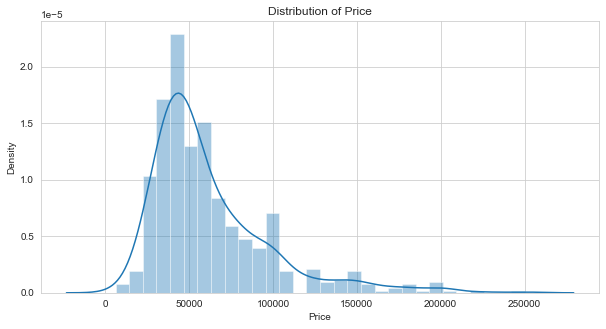

In [15]:
#Distribution of the target feature - "Price"
plt.figure(figsize=(10,5))
sns.distplot(df["Price"])
plt.title("Distribution of Price")

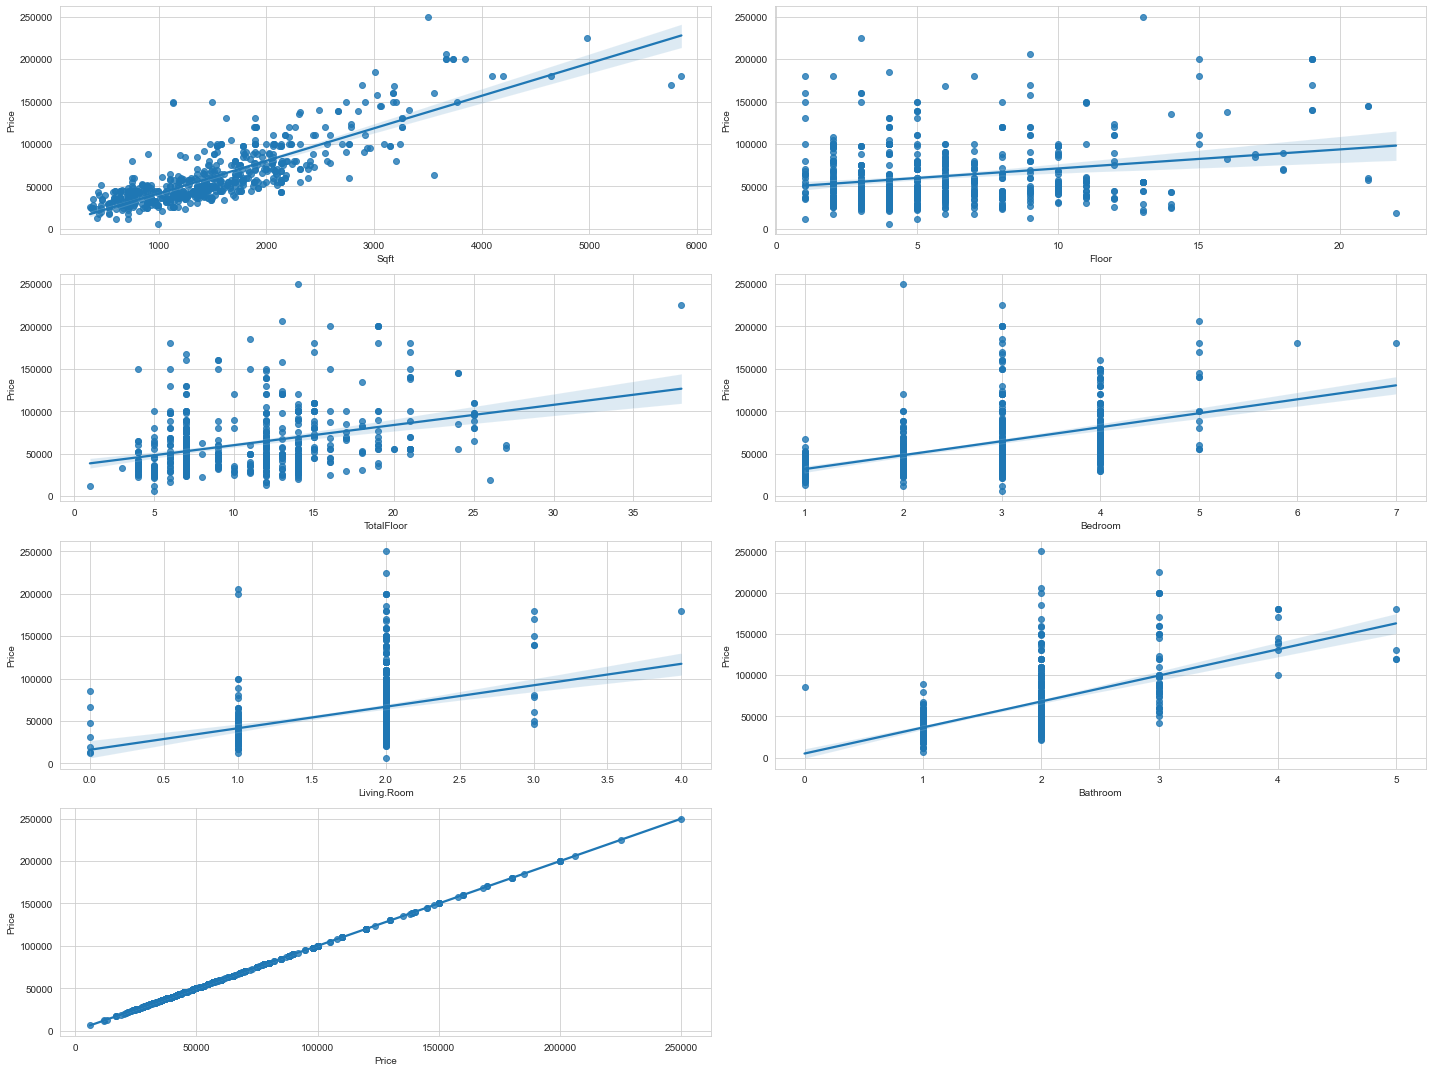

In [16]:
#scatter plot of every feature with target feature to gather insights on the outliers
plt.figure(figsize=(20,15))
for i,v in enumerate(df.columns,start=1):
    plt.subplot(4,2,i)
    sns.regplot(data=df,x=v,y="Price")
plt.tight_layout()

In [17]:
df[df["Floor"]>20]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
28.0,3059.880,21,24,4,2,3,145000
41.0,3063.438,21,24,5,2,4,145000
246.0,1899.972,21,27,4,2,2,57000
369.0,537.258,22,26,1,0,1,19000
603.0,1458.780,21,27,3,2,2,60000


In [18]:
df.drop((df[df["Floor"]>20]).index, inplace = True)

In [19]:
df.shape

(640, 7)

<AxesSubplot:xlabel='Floor', ylabel='Price'>

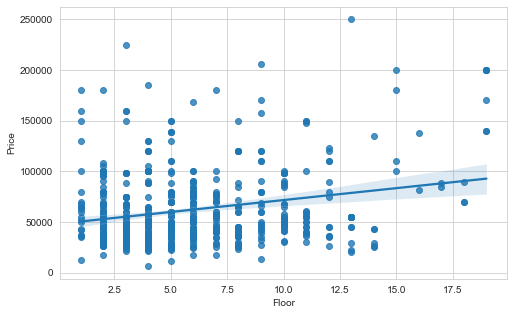

In [20]:
plt.figure(figsize=(8,5))
sns.regplot(data=df,x="Floor",y="Price")

In [21]:
df.drop(df[df["TotalFloor"]>35].index,inplace = True)

In [22]:
df.shape

(639, 7)

<AxesSubplot:xlabel='TotalFloor', ylabel='Price'>

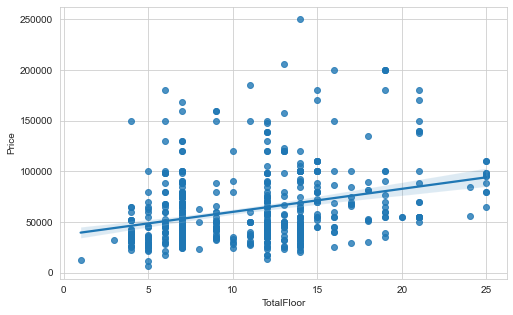

In [23]:
plt.figure(figsize=(8,5))
sns.regplot(data=df,x="TotalFloor",y="Price")

In [24]:
df[df["Living.Room"]>3.9]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
55.0,4643.19,1,6,5,4,4,180000


In [25]:
df.drop(df[df["Living.Room"]>3.9].index,inplace =True)

<AxesSubplot:xlabel='Living.Room', ylabel='Price'>

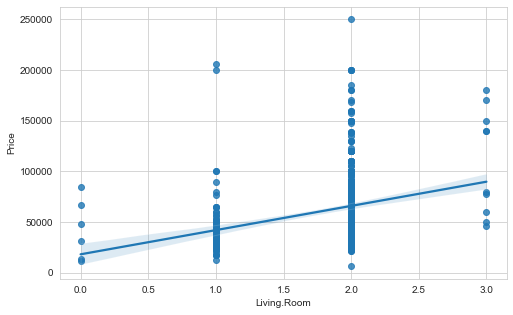

In [26]:
plt.figure(figsize=(8,5))
sns.regplot(data=df,x="Living.Room",y="Price")

In [27]:
df[df["Bathroom"]==0]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
32.0,1245.3,10,12,3,0,0,85000


<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

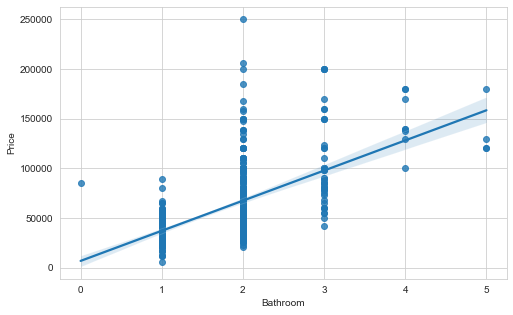

In [28]:
plt.figure(figsize=(8,5))
sns.regplot(data=df,x="Bathroom",y="Price")

<AxesSubplot:>

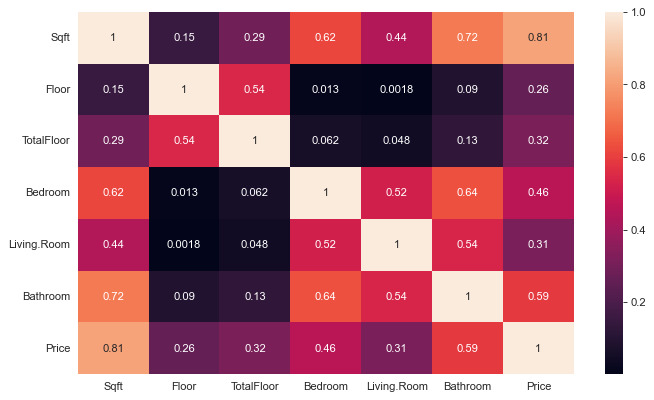

In [29]:
plt.figure(figsize=(10,6),dpi=80)
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Living.Room', ylabel='Price'>

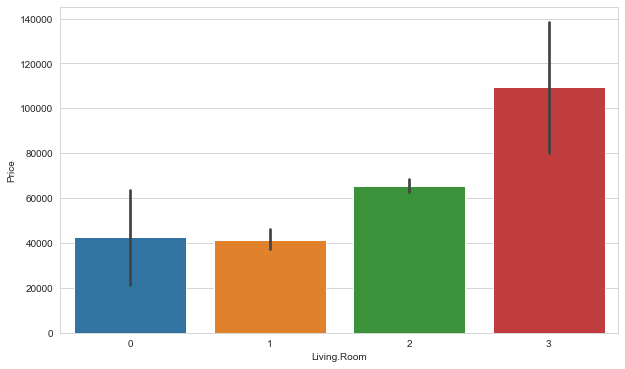

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="Living.Room",y="Price")

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

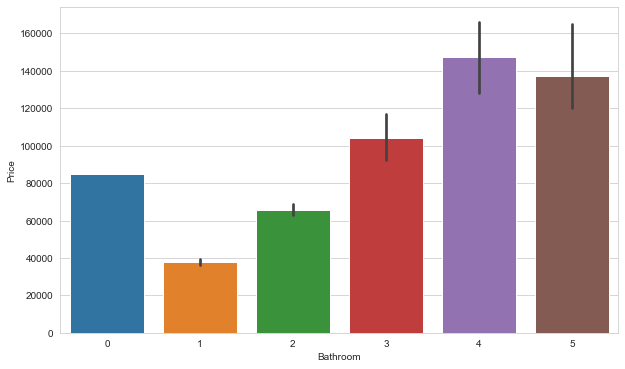

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="Bathroom",y="Price")

<AxesSubplot:xlabel='Bedroom', ylabel='Price'>

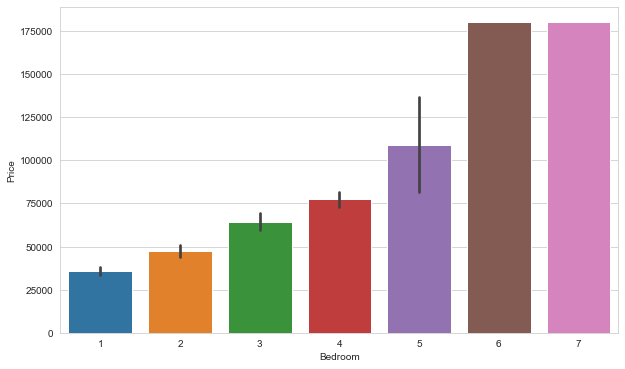

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="Bedroom",y="Price")

<AxesSubplot:xlabel='TotalFloor', ylabel='Price'>

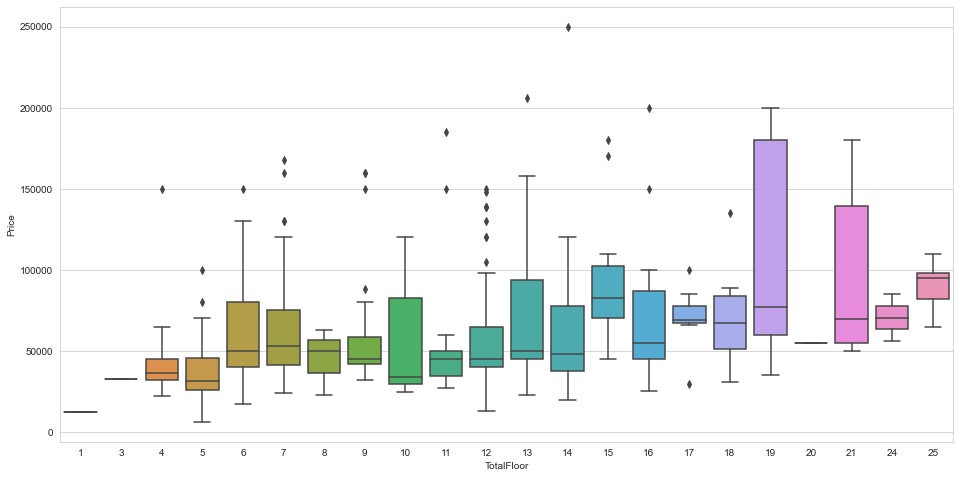

In [33]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df,x="TotalFloor",y="Price")

<AxesSubplot:xlabel='Floor', ylabel='Price'>

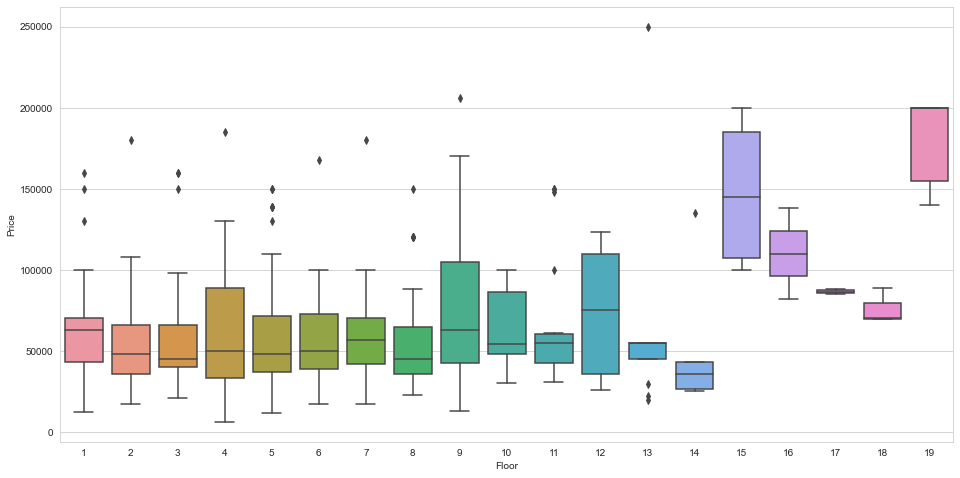

In [34]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df,x="Floor",y="Price")

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']] = scaler.fit_transform(df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']])

In [38]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [39]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1.0,-0.452484,-1.049122,-0.785276,-0.826323,0.417594,0.296421,62000
2.0,0.836694,-0.227846,-0.785276,1.166850,0.417594,0.296421,78000
3.0,-0.505201,-0.227846,-0.785276,-0.826323,0.417594,-1.192686,58000
4.0,-0.073878,-1.049122,-0.785276,0.170263,0.417594,0.296421,45000
5.0,-0.735241,1.414705,0.698245,0.170263,0.417594,0.296421,45000


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x = df.drop("Price",axis = 1)
y = df["Price"]

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=101)

In [43]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(510, 6)
(128, 6)
(510,)
(128,)


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [47]:
y_train_pred = lm.predict(xtrain)
y_test_pred = lm.predict(xtest)

In [50]:
from sklearn import metrics
r2 = metrics.r2_score

In [51]:
print('Training Score : ',r2(ytrain,y_train_pred))
print('Testing Score : ',r2(ytest,y_test_pred))

Training Score :  0.6807975931470545
Testing Score :  0.6977350972470826


In [52]:
mse = metrics.mean_squared_error

In [53]:
print('Training Score : ',mse(ytrain,y_train_pred))
print('Testing Score : ',mse(ytest,y_test_pred))

Training Score :  394376511.4461546
Testing Score :  309818155.4456105


In [54]:
print('Training Score : ',np.sqrt(mse(ytrain,y_train_pred)))
print('Testing Score : ',np.sqrt(mse(ytest,y_test_pred)))

Training Score :  19858.91516287218
Testing Score :  17601.652065803668
